In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [2]:
train_path ='ANN/train'

In [3]:
valid_path = 'ANN/valid'

In [4]:
test_path = 'ANN/test'

In [36]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['dog','cat'],batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path,  target_size=(224,224), classes=['dog','cat'],batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_path,  target_size=(224,224), classes=['dog','cat'],batch_size=10)

Found 40 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [37]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [38]:
imgs, labels = next(train_batches)

c:\users\harshit\appdata\local\programs\python\python37\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


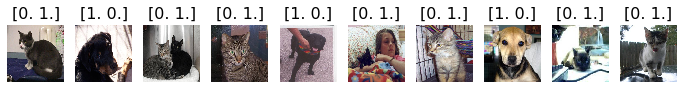

In [39]:
plots(imgs,titles=labels)

In [40]:
#Creating A CNN

In [41]:
model = Sequential([
    Conv2D(32,(3,3), activation='relu',input_shape=(224,224,3)),Flatten(),Dense(2, activation='softmax'),
])

In [42]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [43]:
model.fit_generator(train_batches, steps_per_epoch=4,validation_data=valid_batches,validation_steps=4,epochs=5,verbose=2)

Epoch 1/5
 - 2s - loss: 2622.5366 - accuracy: 0.3750 - val_loss: 2390.7927 - val_accuracy: 0.5000
Epoch 2/5
 - 1s - loss: 1550.1231 - accuracy: 0.4000 - val_loss: 1554.4019 - val_accuracy: 0.5000
Epoch 3/5
 - 1s - loss: 2125.7123 - accuracy: 0.5000 - val_loss: 707.5792 - val_accuracy: 0.5000
Epoch 4/5
 - 1s - loss: 633.1404 - accuracy: 0.5000 - val_loss: 864.6876 - val_accuracy: 0.5000
Epoch 5/5
 - 1s - loss: 963.9397 - accuracy: 0.5000 - val_loss: 497.1295 - val_accuracy: 0.3750


c:\users\harshit\appdata\local\programs\python\python37\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


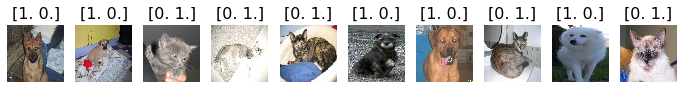

In [44]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs,titles=test_labels)

In [45]:
test_labels = test_labels[:,0]

In [46]:
test_labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0.], dtype=float32)

In [47]:
predictions = model.predict_generator(test_batches, steps=1,verbose=0)

In [48]:
predictions

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [49]:
cm = confusion_matrix(test_labels,predictions[:,0])

In [50]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[0 5]
 [1 4]]


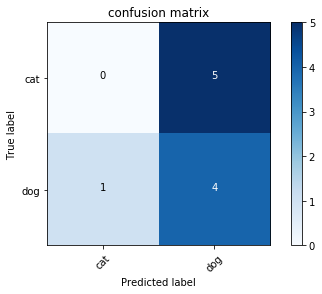

In [51]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm, cm_plot_labels, title='confusion matrix')

In [52]:
vgg16_model =keras.applications.vgg16.VGG16()

In [53]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [54]:
type(vgg16_model)

keras.engine.training.Model

In [55]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [56]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [57]:
for layer in model.layers:
    layer.trainablw = False

In [58]:
model.add(Dense(2,activation='softmax'))

In [59]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [60]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [61]:
model.fit_generator(train_batches, steps_per_epoch=4,validation_data=valid_batches,validation_steps=4,epochs=5,verbose=2)

Epoch 1/5
 - 82s - loss: 2.3282 - accuracy: 0.4500 - val_loss: 0.6559 - val_accuracy: 0.6250
Epoch 2/5
 - 73s - loss: 0.5040 - accuracy: 0.7500 - val_loss: 1.7839 - val_accuracy: 0.8125
Epoch 3/5
 - 73s - loss: 0.3835 - accuracy: 0.8000 - val_loss: 0.1514 - val_accuracy: 0.8750
Epoch 4/5
 - 74s - loss: 0.0323 - accuracy: 1.0000 - val_loss: 1.2595 - val_accuracy: 0.7500
Epoch 5/5
 - 75s - loss: 0.0043 - accuracy: 1.0000 - val_loss: 1.8557 - val_accuracy: 0.8750
